In [29]:
#Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline


# Load data in a dataframe:
df = pd.read_csv("winequality-red.csv")
y = df['quality']
df.drop('quality', axis='columns', inplace=True)


## Part 1: Exploratory Analysis

In [24]:
# Data exploration:
# regression task
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000


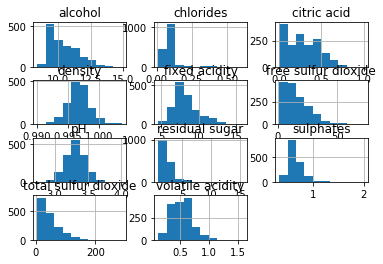

In [25]:
df.hist();

[Text(0, 0, 'fixed acidity'),
 Text(0, 0, 'volatile acidity'),
 Text(0, 0, 'citric acid'),
 Text(0, 0, 'residual sugar'),
 Text(0, 0, 'chlorides'),
 Text(0, 0, 'free sulfur dioxide'),
 Text(0, 0, 'total sulfur dioxide'),
 Text(0, 0, 'density'),
 Text(0, 0, 'pH'),
 Text(0, 0, 'sulphates'),
 Text(0, 0, 'alcohol')]

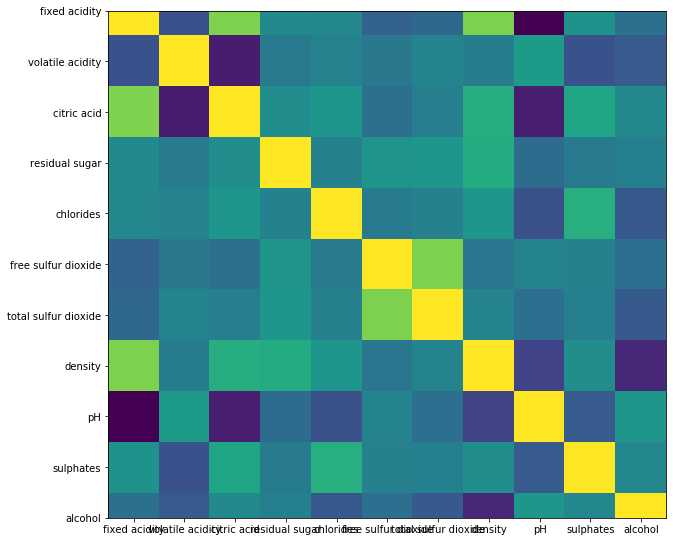

In [26]:
correlation_matrix = df.corr()
fig, ax = plt.subplots()
fig.set_size_inches(10 ,10)
ax.imshow(correlation_matrix)
features = df.columns;
ax.set_xticks(np.arange(len(features)))
ax.set_yticks(np.arange(len(features)))
ax.set_xticklabels(features)
ax.set_yticklabels(features)


There are a few highly correlated variables, like pH and fixed acidity, citric acid and volatile acidity, citric acid and pH. We might consider generating an extra variable which accounts for their correlation.

In [36]:
Xtrain,Xtest,ytrain,ytest = train_test_split(df, y, random_state =0)


Text(0, 0.5, 'cumulative explained variance')

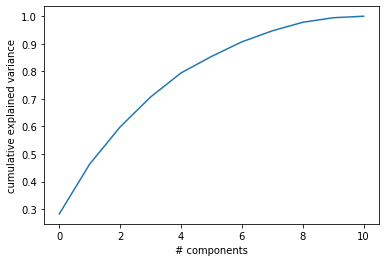

In [41]:
# PCA of first two

pipeline = Pipeline([('scaling', StandardScaler()), ('pca', PCA())])
pca = pipeline.fit_transform(Xtrain) 
#pca = PCA().fit(digits.data)
explained_variance = np.var(pca, axis=0)
explained_variance_ratio = explained_variance / np.sum(explained_variance)
plt.plot(np.cumsum(explained_variance_ratio))
plt.xlabel('# components')
plt.ylabel('cumulative explained variance')

The cumulative explained variance shows that we might as well use all 10 available dimensions.

In [ ]:
# linear regression - use to compare other models
# PCA into two dimensions and visualizations,
# covariance matrix and finding out highly correlating variables

## Part 2: Models

1. Explore regression models which to predict good quality of the wine.

2. Predict very bad quality, perform some sort of binary classification, where we define a treshold for bad wine quality. 